In [1]:
from Clarinet.melodyextraction.noBERT.song2graph import song2graph
from Clarinet.utils.convert import midi2text
from Clarinet.search import similarity
import os
import pandas as pd
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
import numpy as np

In [2]:
pitch_map = {
    12: "C",
    13: "C#",
    14: "D",
    15: "D#",
    16: "E",
    17: "F",
    18: "F#",
    19: "G",
    20: "G#",
    21: "A",
    22: "A#",
    23: "B"
    }
def get_pitch_name(pitch):
    num = pitch % 12
    return pitch_map[num + 12]

In [3]:
def dropRest(melody):
    new_melody = []
    for i in range(len(melody)):
        if melody[i] != 129:
            new_melody.append(melody[i])
    return new_melody

In [10]:
def loadWeight(numpy_folder):
    #return np.load(numpy_folder+"/weight.npy")
    return np.load(numpy_folder+"/melodic.npy")

weights = loadWeight("Data/Numpy/noBERT")
weights = -1 * weights

In [11]:
def evaluate(midi_file):
    actual=midi2text(midi_file)
    g=song2graph(midi_file,weights)
    melody = g.melody()
    melody = dropRest(melody)
    predicted = [get_pitch_name(pitch) for pitch in melody]
    predicted="".join(predicted)

    return(similarity(predicted,actual))

In [12]:
def evaluateFolder(midi_folder,num_files=-1):
    files=sorted([f"{midi_folder}/{filename}" for filename in os.listdir(midi_folder)])
    if num_files==-1:
        num_files=len(files)
    df=pd.DataFrame(columns=["Filename","Score"])
    for i in tqdm(range(num_files)):
        file=files[i]
        score=evaluate(file)
        df=df.append({"Filename":file,"Score":score},ignore_index=True)
    return(df)

100%|██████████| 20/20 [05:00<00:00, 15.03s/it]


,Score
mean,0.503441
std,0.086142
min,0.336634
25%,0.435268
50%,0.509259
75%,0.569746
max,0.666667


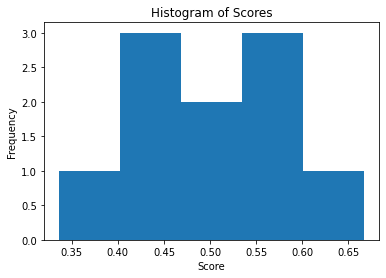

In [14]:
midi_folder="/Users/kshitij1/Documents/GitHub/Clarinet/Data/Midi/Collection/Original Collection"
df=evaluateFolder(midi_folder,num_files=20)




# plot histogram of scores
plt.hist(df["Score"])
# label hist
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")

df_stats=df.describe()
df_stats.drop(df_stats.index[0])